In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [71]:
dataset = pd.read_csv('./archive/winemag-data-130k-v2.csv',index_col='Unnamed: 0')
dataset.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [72]:
dataset.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [73]:
dataset.dropna()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129919,US,"This ripe, rich, almost decadently thick wine ...",Reserve,91,105.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars
129926,US,This pure Syrah from Reininger's estate vineya...,Ash Hollow Vineyard,91,41.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger
129945,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino
129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs


In [74]:
selected_columns = ['points', 'price', 'description']
subset_data = dataset[selected_columns]
subset_data

,points,price,description
0,87,NaN,"Aromas include tropical fruit, broom, brimston..."
1,87,15.0,"This is ripe and fruity, a wine that is smooth..."
2,87,14.0,"Tart and snappy, the flavors of lime flesh and..."
3,87,13.0,"Pineapple rind, lemon pith and orange blossom ..."
4,87,65.0,"Much like the regular bottling from 2012, this..."
...,...,...,...
129966,90,28.0,Notes of honeysuckle and cantaloupe sweeten th...
129967,90,75.0,Citation is given as much as a decade of bottl...
129968,90,30.0,Well-drained gravel soil gives this wine its c...
129969,90,32.0,"A dry style of Pinot Gris, this is crisp with ..."


In [75]:
# Normalizing points
subset_data['points_normalized'] = (subset_data['points'] - subset_data['points'].min()) / (subset_data['points'].max() - subset_data['points'].min())
subset_data['price_normalized'] = (subset_data['price'] - subset_data['price'].min()) / (subset_data['price'].max() - subset_data['price'].min())
subset_data

/var/folders/tt/5kjx4z6x2yn7w8jwv8tv5xz80000gn/T/ipykernel_1278/2963063550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['points_normalized'] = (subset_data['points'] - subset_data['points'].min()) / (subset_data['points'].max() - subset_data['points'].min())
/var/folders/tt/5kjx4z6x2yn7w8jwv8tv5xz80000gn/T/ipykernel_1278/2963063550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['price_normalized'] = (subset_data['price'] - subset_data['price'].min()) / (subset_data['price

,points,price,description,points_normalized,price_normalized
0,87,NaN,"Aromas include tropical fruit, broom, brimston...",0.35,NaN
1,87,15.0,"This is ripe and fruity, a wine that is smooth...",0.35,0.003337
2,87,14.0,"Tart and snappy, the flavors of lime flesh and...",0.35,0.003034
3,87,13.0,"Pineapple rind, lemon pith and orange blossom ...",0.35,0.002731
4,87,65.0,"Much like the regular bottling from 2012, this...",0.35,0.018507
...,...,...,...,...,...
129966,90,28.0,Notes of honeysuckle and cantaloupe sweeten th...,0.50,0.007282
129967,90,75.0,Citation is given as much as a decade of bottl...,0.50,0.021541
129968,90,30.0,Well-drained gravel soil gives this wine its c...,0.50,0.007888
129969,90,32.0,"A dry style of Pinot Gris, this is crisp with ...",0.50,0.008495


In [76]:
# Find corrolation between points and price
cor_points_price = subset_data['points'].corr(subset_data['price'])
print(f"Correlation of 'points' and 'price': {cor_points_price}")

Correlation of 'points' and 'price': 0.4161667418606219


In [77]:
# Average length characters in descriptions:
subset_data['description_length'] = subset_data['description'].apply(lambda x: len(str(x)))
avg_description_length = subset_data['description_length'].mean()
print(f"Average length of review descriptions: {avg_description_length:.2f} characters")

Average length of review descriptions: 242.60 characters


/var/folders/tt/5kjx4z6x2yn7w8jwv8tv5xz80000gn/T/ipykernel_1278/2974817567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['description_length'] = subset_data['description'].apply(lambda x: len(str(x)))


In [78]:
# Save updated Data
subset_data.to_csv('cleaned_transformed_data.csv', index=False)

In [79]:
#take numerical_columns and get clear information about them
numerical_columns = dataset.select_dtypes(include=['number']).columns
summary_stats = dataset[numerical_columns].describe()
summary_stats

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


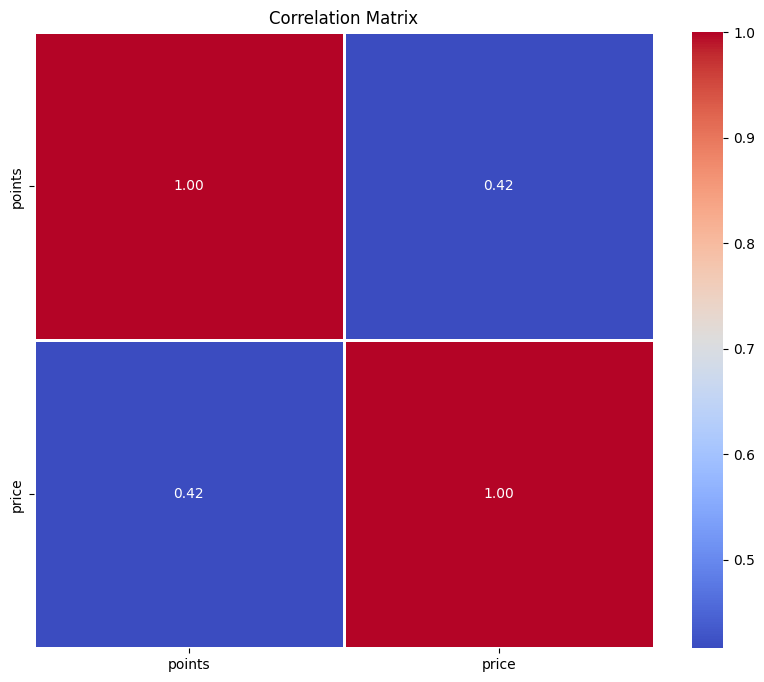

In [80]:
# Reprecent correlation of two numerical columns in heatmap
correlation_matrix = dataset[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

Strong Correlations:
        points  price
points     1.0    NaN
price      NaN    1.0


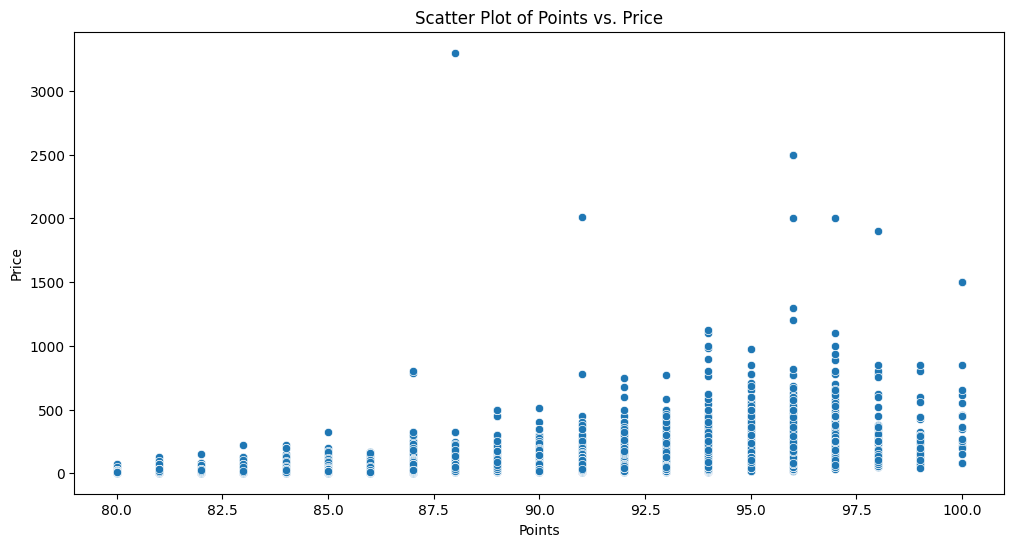

In [81]:
# demonstrate STRONG corrolation of price and points
strong_correlations = correlation_matrix[(correlation_matrix > 0.5)]
print("Strong Correlations:")
print(strong_correlations)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='points', y='price', data=dataset)
plt.title('Scatter Plot of Points vs. Price')
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()


In [82]:
# Defining T-statistic and P-value in points and points
high_points_wines = dataset[dataset['points'] >= 90]
low_points_wines = dataset[dataset['points'] < 90]

t_stat, p_value = ttest_ind(high_points_wines['price'].dropna(), low_points_wines['price'].dropna())

print("\nHypothesis Testing Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average price between high and low points wines.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average price between high and low points wines.")


Hypothesis Testing Results:
T-statistic: 122.2982
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in the average price between high and low points wines.


## Answeres

1. Making numbers similar is good to avoid crazy results in statistical tests or machine learning. Standardization changes numbers to have an average of 0 and a standard thing of 1, making them easy to compare and stopping big numbers from taking over.

2. Putting 0s and 1s on categorical things in regression models is common to show if they are there or not. This makes sure the model doesn't think there's some kind of secret order in the categories. If we use numbers, the model might get confused and think there's a real order.

3. Tables with numbers or computer programs give important numbers and p-values for confidence levels or important points. Trusting these things is really important to figure out if our tests are important. It makes sure we only say the null idea is wrong when we're really, really sure.

4. Looking at pictures and graphs is super important in data stuff because it helps us see patterns and things in the data really easily. Pictures help find weird numbers, know how numbers are spread out, and tell others what we found. This makes sure people who look at the data can make good choices and understand things better.

5. When some numbers are missing, we can either throw them away, guess them, or fill them in based on other numbers. It's really important to do something about missing numbers so our studies are fair and our answers make sense. If we don't care about missing numbers, our studies might not work well, and our answers might be wrong for everyone.

6. Sometimes, weird numbers can mess up our data math. They can make our average numbers go funny and spread out our numbers too much. Fixing weird numbers involves cutting them, changing them, or using different numbers. If we don't fix weird numbers, our answers might be totally wrong and not very good.

7. Picking which math test to use depends on what our numbers look like and what we want to know. For instance, t-tests check if two groups have similar averages, ANOVA checks lots of groups, and chi-square looks at numbers that aren't normal. Choosing the best test means thinking about how we're studying things, what our numbers are like, and the rules each math test has.

In [83]:
# Import necessary Libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from textblob import TextBlob

In [84]:
# Take 20000 tags in youtube dataset
youtube_data = pd.read_csv('./youtube.csv')
tags_data = youtube_data['tags'][:2000]
tags_data

0                                         SHANtell martin
1       last week tonight trump presidency|"last week ...
2       racist superman|"rudy""|""mancuso""|""king""|"...
3       rhett and link|"gmm""|""good mythical morning"...
4       ryan|"higa""|""higatv""|""nigahiga""|""i dare ...
                              ...                        
1995    the real|"daytime""|""talk show""|""women""|""...
1996    Full Frontal with Samantha Bee|"Full Frontal""...
1997    emergence|"ants""|""intelligence""|""ant""|""s...
1998    DJ Snake|"Lauv""|""A Different Way""|""Arc De ...
1999                      auth-jking413-auth|"Jay-King"""
Name: tags, Length: 2000, dtype: object

In [85]:
# Download required stuffs
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/javlonvaliyev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/javlonvaliyev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
# function to separate words in tags 
def process_text(text):
    tokens = word_tokenize(str(text).lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return stemmed_tokens

In [87]:
processed_tags_data = [process_text(text) for text in tags_data]
processed_tags_data

[['shantel', 'martin'],
 ['last',
  'week',
  'tonight',
  'trump',
  'last',
  'week',
  'tonight',
  'donald',
  'trump',
  'john',
  'oliv',
  'trump',
  'donald',
  'trump'],
 ['racist',
  'rudi',
  'mancuso',
  'king',
  'bach',
  'racist',
  'superman',
  'love',
  'rudi',
  'mancuso',
  'poo',
  'bear',
  'black',
  'white',
  'offici',
  'music',
  'video',
  'iphon',
  'x',
  'pineappl',
  'lelepon',
  'hannahstock',
  'rudymancuso',
  'inanna',
  'anwar',
  'sarki',
  'shot',
  'shotsstudio',
  'alesso',
  'anitta',
  'brazil',
  'get',
  'driver',
  'licens',
  'lele',
  'pon'],
 ['rhett',
  'gmm',
  'good',
  'mythic',
  'morn',
  'rhett',
  'link',
  'good',
  'mythic',
  'morn',
  'good',
  'mythic',
  'morn',
  'rhett',
  'link',
  'mythic',
  'morn',
  'season',
  '12',
  'nickelback',
  'lyric',
  'nickelback',
  'lyric',
  'real',
  'fake',
  'nickelback',
  'nickelback',
  'song',
  'nickelback',
  'song',
  'rhett',
  'link',
  'nickelback',
  'gmm',
  'nickelback',

In [88]:
# Show top 20 words in tags
flat_list = [word for sublist in processed_tags_data for word in sublist]
freq_dist = FreqDist(flat_list)
print('The most 20 ones:', freq_dist.most_common(20))

The most 20 ones: [('video', 477), ('funni', 379), ('iphon', 359), ('music', 347), ('show', 330), ('new', 320), ('movi', 304), ('news', 282), ('2017', 261), ('anim', 255), ('comedi', 229), ('review', 228), ('x', 225), ('live', 213), ('cat', 199), ('celebr', 193), ('makeup', 180), ('late', 174), ('christma', 173), ('offici', 155)]


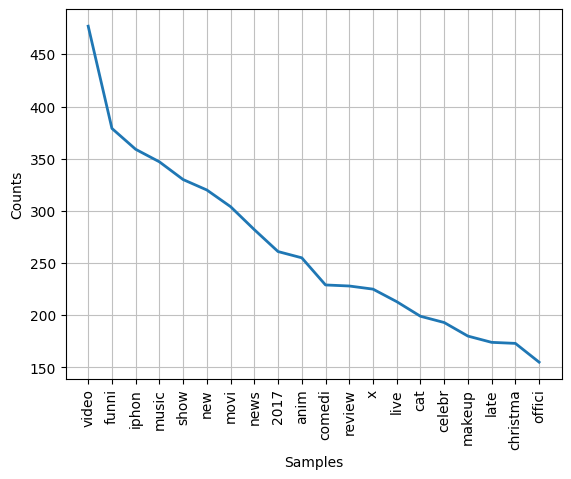

In [89]:
# top 20 words of tags in linear visualisation
freq_dist.plot(20, cumulative=False)
plt.show()

In [90]:
# Find sentiments in top 5 tags
subset_tags = tags_data[:5]
sentiments = [TextBlob(text).sentiment.polarity for text in subset_tags]
sentiments

[0.0, 0.0, 0.11111111111111112, 0.2666666666666666, -0.3499999999999999]

In [91]:
# Sentiment Analysis Results:
print("Sentiment Analysis Results:")
for i, sentiment in enumerate(sentiments, start=1):
    print(f"Text {i}: {'Positive' if sentiment > 0 else 'Negative' if sentiment < 0 else 'Neutral'} (Polarity: {sentiment:.2f})")

Sentiment Analysis Results:
Text 1: Neutral (Polarity: 0.00)
Text 2: Neutral (Polarity: 0.00)
Text 3: Positive (Polarity: 0.11)
Text 4: Positive (Polarity: 0.27)
Text 5: Negative (Polarity: -0.35)


## Insight Generation
The dataset captured my interest as people are currently immersed in investing their time on *YouTube*. The exploration of this dataset stemmed from my inquisitiveness about comprehending the categories of subjects that genuinely engage social media audiences. Moreover, I recognize the opportunity to utilize this analysis to provide valuable perspectives to content creators, specifically in refining their video advertisements. With the ability to identify trending topics and foresee top-ranking videos, my goal is to elevate my personal content creation approach on YouTube, ensuring it resonates with audience preferences.
* Most well-known tags: video, funni, iphon, music, show, new, movi, news, 2017, anim


It is true that only tags are enough for that stuffs. However, now main focus is not doing prerfectly done analysis, but demonstrat a bit what can i do